# Find an appropriate cluster solution for this data

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import cluster
from sklearn import preprocessing
from sklearn import metrics


zoo = pd.read_csv('zoo.csv', index_col='animal_name')
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [162]:
# Remove catsize and class_type as they are labels
X = zoo.drop(['catsize', 'class_type'], axis=1)
X.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000


In [163]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
animal_name,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0


In [164]:
X_scaled = preprocessing.StandardScaler().fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
animal_name,,,,,,,,,,,,,,,
aardvark,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353
antelope,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353
bass,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353
bear,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353
boar,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353
wasp,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353
wolf,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353


<AxesSubplot:>

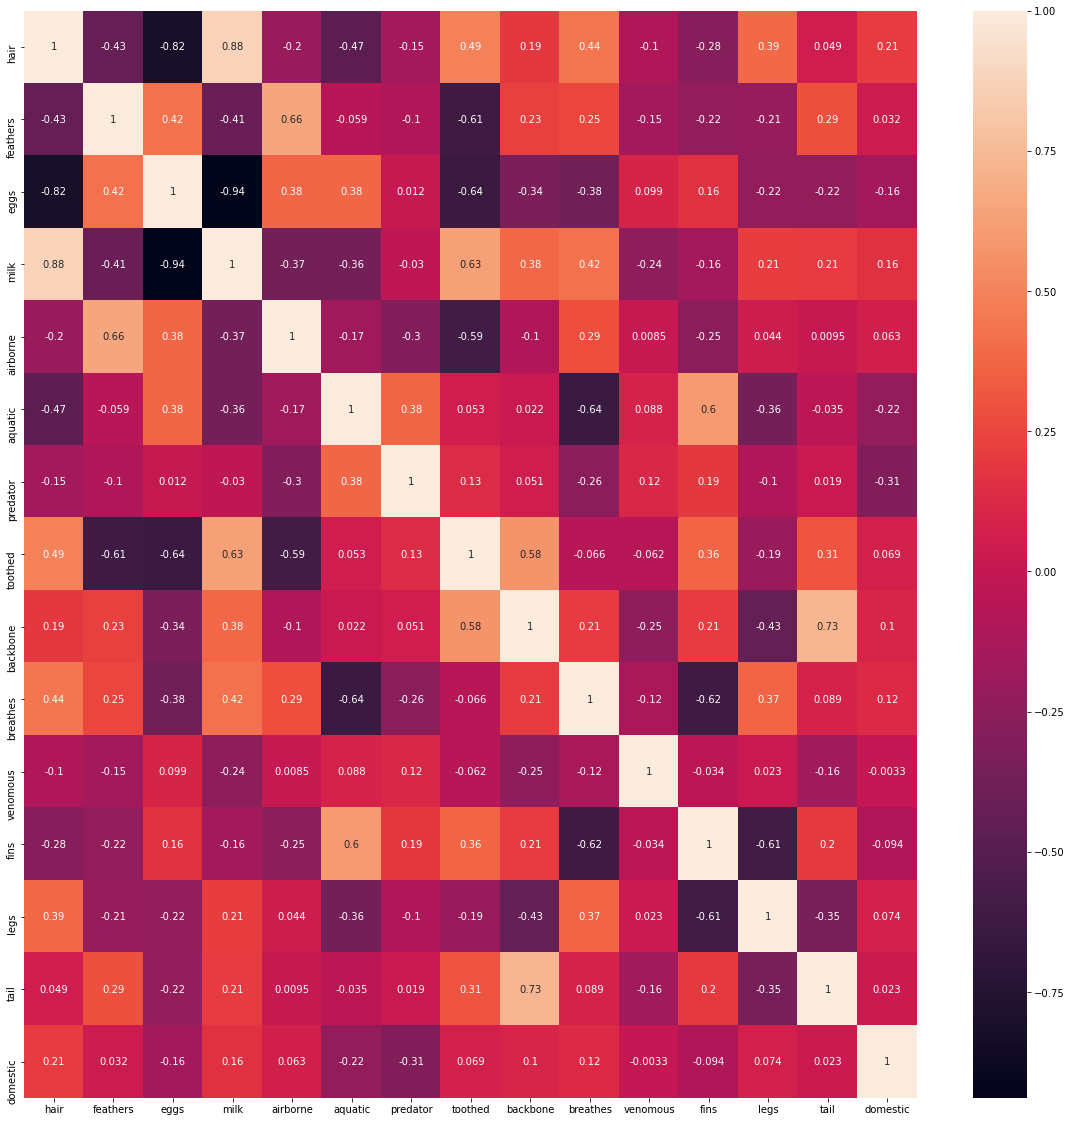

In [165]:
fig, ax = plt.subplots(figsize=[20,20])
sns.heatmap(X_scaled_df.corr(), annot=True, ax=ax)

In [166]:
cls = cluster.KMeans(n_clusters=2)
cls.fit(X_scaled_df)

KMeans(n_clusters=2)

In [167]:
prediction = X_scaled_df.copy()
prediction['labels'] = cls.labels_
prediction['labels'] = prediction['labels'].astype('int')
prediction

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,labels
animal_name,,,,,,,,,,,,,,,,
aardvark,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,0
antelope,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,0
bass,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,1
bear,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,0
boar,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,0
wasp,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,1
wolf,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,0


<AxesSubplot:>

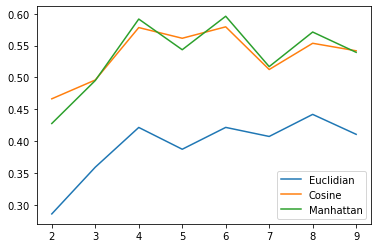

In [206]:
s_euc_list = []
s_cos_list = []
s_man_list = []

for i in range(2,10):
    cls = cluster.KMeans(n_clusters=i)
    cls.fit(X_scaled_df)
    s_euc_list.append(metrics.silhouette_score(X_scaled_df, cls.labels_, metric='euclidean'))
    s_cos_list.append(metrics.silhouette_score(X_scaled_df, cls.labels_, metric='cosine'))
    s_man_list.append(metrics.silhouette_score(X_scaled_df, cls.labels_, metric='manhattan'))
    
sil = pd.DataFrame({
    'Euclidian': s_euc_list,
    'Cosine': s_cos_list,
    'Manhattan': s_man_list
    }, index=range(2,10))

sil.plot()

In [207]:
cls = cluster.KMeans(n_clusters=6)
cls.fit(X_scaled_df)

KMeans(n_clusters=6)

In [208]:
evaluate = X.copy()
evaluate['cluster'] = cls.labels_
for c in np.sort(evaluate['cluster'].unique()):
    print(f'Cluster: {c}')
    print('-----------')
    for animal in evaluate[evaluate['cluster'] == c].index:
        print(animal)
    print('\n\n')

Cluster: 0
-----------
bass
carp
catfish
chub
dogfish
dolphin
haddock
herring
pike
piranha
porpoise
seahorse
sole
stingray
tuna



Cluster: 1
-----------
aardvark
antelope
bear
boar
buffalo
calf
cavy
cheetah
deer
elephant
fruitbat
giraffe
girl
goat
gorilla
hamster
hare
leopard
lion
lynx
mink
mole
mongoose
opossum
oryx
platypus
polecat
pony
puma
pussycat
raccoon
reindeer
seal
sealion
squirrel
vampire
vole
wallaby
wolf



Cluster: 2
-----------
chicken
crow
dove
duck
flamingo
gull
hawk
kiwi
lark
ostrich
parakeet
penguin
pheasant
rhea
skimmer
skua
sparrow
swan
tortoise
vulture
wren



Cluster: 3
-----------
flea
gnat
honeybee
housefly
ladybird
moth
slug
termite
wasp
worm



Cluster: 4
-----------
frog
frog
newt
pitviper
scorpion
seasnake
slowworm
toad
tuatara



Cluster: 5
-----------
clam
crab
crayfish
lobster
octopus
seawasp
starfish





**Exploring DBSCAN**

<AxesSubplot:>

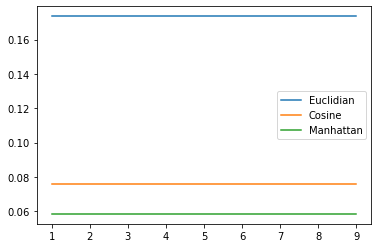

In [217]:
s_euc_list = []
s_cos_list = []
s_man_list = []

for i in range(1, 10):
    cls = cluster.DBSCAN(eps=i/10)
    cls.fit(X_scaled_df)
    s_euc_list.append(metrics.silhouette_score(X_scaled_df, cls.labels_, metric='euclidean'))
    s_cos_list.append(metrics.silhouette_score(X_scaled_df, cls.labels_, metric='cosine'))
    s_man_list.append(metrics.silhouette_score(X_scaled_df, cls.labels_, metric='manhattan'))
    
sil = pd.DataFrame({
    'Euclidian': s_euc_list,
    'Cosine': s_cos_list,
    'Manhattan': s_man_list
    }, index=range(1,10))

sil.plot()

Not that useful except to say that eps didn't have an effect with this example

In [221]:
cls = cluster.DBSCAN()
cls.fit(X_scaled_df)

X_scaled_df['labels'] = cls.labels_
X_scaled_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,labels
animal_name,,,,,,,,,,,,,,,,
aardvark,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,-1
antelope,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,0
bass,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,1
bear,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,-1
boar,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,-1
wasp,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-1
wolf,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,2
